<a href="https://www.kaggle.com/code/felixbennett/flight-satisfaction-analysis?scriptVersionId=108392932" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-customer-satisfaction/Invistico_Airline.csv


# Airline Analysis

## Aim: Find the differences between satisfied and disatisfied satisfaction surveys.

### Load in Data

In [2]:
df = pd.read_csv('../input/airlines-customer-satisfaction/Invistico_Airline.csv')
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

### Change Satisfaction Column to Boolean Satisfied Column

In [3]:
df['satisfied'] = df['satisfaction'].apply(lambda x: x == 'satisfied')
df = df.drop('satisfaction', axis = 1)

## Visualise Data

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

### Compare Continuous Variables (Flight Distance, Delay Lengths and Age)

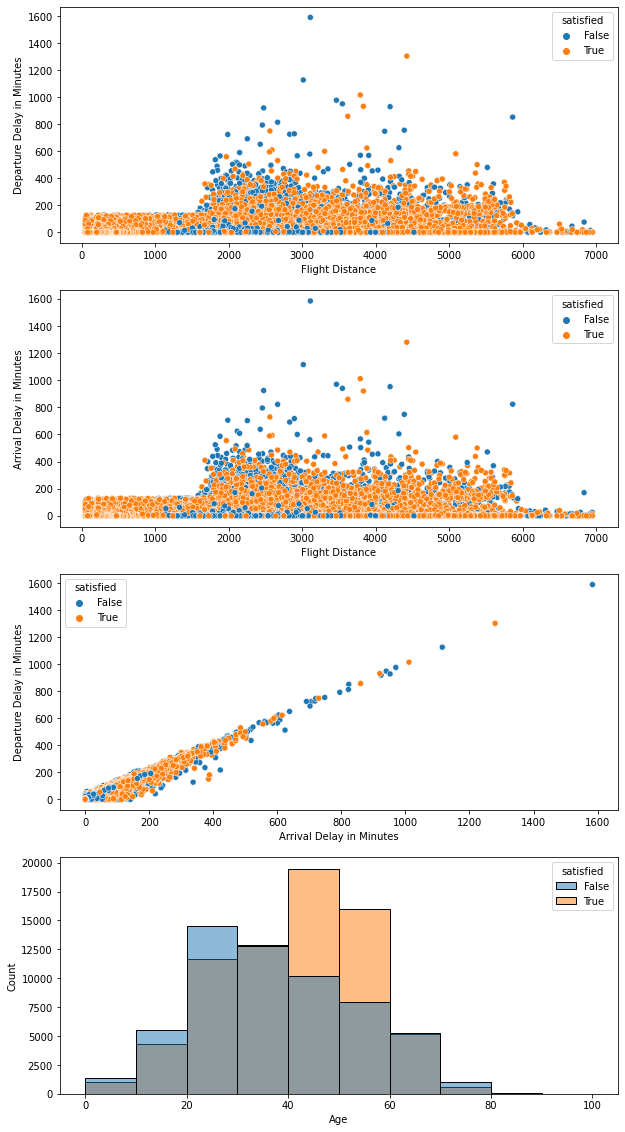

In [5]:
fig, axes = plt.subplots(4,1)
fig.set_size_inches(10,20)
sns.scatterplot(ax = axes[0], data = df, x = 'Flight Distance', y =  'Departure Delay in Minutes', hue = 'satisfied')

sns.scatterplot(ax = axes[1], data = df, x = 'Flight Distance', y =  'Arrival Delay in Minutes', hue = 'satisfied')

sns.scatterplot(ax = axes[2], data = df, x = 'Arrival Delay in Minutes', y =  'Departure Delay in Minutes', hue = 'satisfied')

bins = [0,10,20,30,40,50,60,70,80,90,100]

sns.histplot(ax = axes[3], data = df, x = 'Age',  hue = 'satisfied', bins = bins)

plt.show()

Satisfaction seems to decrease the longer the delay, specifically at the extreme cases.
Have found no clear connection between satisfaction and continuous variables.

### Compare differences in review ratings

Summarize and prepare data

In [6]:
spider_df = df[['satisfied', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']]
spider_data = spider_df.groupby('satisfied').mean()


### Plot Data

In [7]:
import plotly.express as px
binary = [True, False]
titles = ['Satisfied', 'Unsatisfied']

for i in range(2):
    data= spider_data[spider_data.index == binary[i]]
    X = data.iloc[0,:].values.flatten().tolist()
    title = 'Average Satisfaction Ratings: ' + str(titles[i])
    fig = px.line_polar(df, r=X, theta=data.columns, line_close=True, title = title)
    fig.update_traces(fill = 'toself')
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 5]
            )),
      showlegend=False)
    fig.show()
    

### Comparing the two

In [8]:
import plotly.graph_objects as go
binary = [True, False]
titles = ['Satisfied', 'Unsatisfied']
title = 'Mean Satisfaction Ratings:'
fig = go.Figure()
for i in range(2):
    data= spider_data[spider_data.index == binary[i]]
    X = data.iloc[0,:].values.flatten().tolist()
    fig.add_trace(go.Scatterpolar(
      r=X,
      theta=data.columns,
      fill='toself',
      name=titles[i]
    ))
    
fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 5]
            )),
      showlegend=True,
title = title)

fig.show()
    
    
   
    